# DSC 540 Week 5-6
# Kausik Chattapadhyay
# 01/15/2023

# Activity 7: Reading Tabular Data from a Web Page and Creating DataFrames

In this activity, you have been given a Wikipedia page where you have the GDP of all countries listed. You have been asked to create three DataFrames from the three sources mentioned in the page (https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)):

• Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structure Read the page using bs4

• Read the page using bs4

• Find the table structure you will need to deal with (how many tables there are?)

• Find the right table using bs4

• Separate the source names and their corresponding data

• Get the source names from the list of sources you have created

• Separate the header and data from the data that you separated before for the first source only, and then create a DataFrame using that

• Repeat the last task for the other two data sources

In [1]:
# Load the necessary libraries.

from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

In [2]:
# Reading the wikipedia website HTML using beautifulSoup library

url="https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

websiteData = urllib.request.urlopen(url) 

bfData = BeautifulSoup(websiteData) 
websiteData.close()

In [3]:
# Reading Html table structure to find how many tables are there in the HTML

no_of_tables = bfData.find_all("table") 
print("There are " + str(len(no_of_tables)) + " tables in the website HTML")


There are 7 tables in the website HTML


In [4]:
# Find the right table using bs4

# finding table with class wikitable inside HTML, this table holds the data we, are looking for 
tabledata = bfData.find("table", {"class": "wikitable"}) 
print(type(tabledata))


<class 'bs4.element.Tag'>


In [5]:
# Separate the source names and their corresponding data

# finding all rows inside table body non recusively as we are interested in, getting only the top level rows

scRow = tabledata.tbody.findAll('tr', recursive=False)[0]

# finding all table cells inside the table rows non recursively to get only the, heder cells (each cell represents a source) 
scCell = [td for td in scRow.findAll('th')]

# iterating through the anchor tags in each cell to get the names and header

datasources=[]
header=[]
for index, item in enumerate(scCell):
    if (index == 0):
        head = scCell[index].getText().replace('\n',' ').strip()
        header.append(head)
    if (index == 1):
        head = scCell[index].findAll('a')[0].getText().replace('\n',' ').strip()
        header.append(head)
        
    if (index > 1 and index < 5):
        val = scCell[index].findAll('a', title=True)[0].getText().replace('\n',' ').strip()
        datasources.append(val)
        
data = tabledata.tbody.findAll('tr', recursive=False)

for index, item in enumerate(data):
    if index == 1:
        head = data[index].getText().replace('\n',' ').strip()
        for name in head.split():
            header.append(name)

print(datasources) 

print("Header")
print(header) 
        

['IMF', 'World Bank', 'United Nations']
Header
['Country/Territory', 'UN Region', 'Estimate', 'Year', 'Estimate', 'Year', 'Estimate', 'Year']


In [6]:
# Data loaded in a list
data = tabledata.tbody.findAll('tr', recursive=False)

rowdata = []
for key, val in enumerate(data):
    if key > 1:
        data_country = [td.getText().replace('\n',' ').strip() for td in val.findAll('td')]
        rowdata.append(data_country)

print(rowdata[1])


['United States', 'Americas', '25,035,164', '2022', '22,996,100', '2021', '20,893,746', '2020']


Creating a Dataframe

In [7]:
header=['Country/Territory', 'UN Region', 'IMF_Estimate', 'IMF_Year', 'World Bank_Estimate', 'World Bank_Year', 'United Nations_Estimate', 'United Nations_Year']
df = pd.DataFrame(rowdata, columns=header)
df.head(10)

,Country/Territory,UN Region,IMF_Estimate,IMF_Year,World Bank_Estimate,World Bank_Year,United Nations_Estimate,United Nations_Year
0,World,—,"101,560,901",2022,"96,100,091",2021,"85,328,323",2020
1,United States,Americas,"25,035,164",2022,"22,996,100",2021,"20,893,746",2020
2,China,Asia,"18,321,197",[n 1]2022,"17,734,063",[n 3]2021,"14,722,801",[n 1]2020
3,Japan,Asia,"4,300,621",2022,"4,937,422",2021,"5,057,759",2020
4,Germany,Europe,"4,031,149",2022,"4,223,116",2021,"3,846,414",2020
5,India,Asia,"3,468,566",2022,"3,173,398",2021,"2,664,749",2020
6,United Kingdom,Europe,"3,198,470",2022,"3,186,860",2021,"2,764,198",2020
7,France,Europe,"2,778,090",2022,"2,937,473",2021,"2,630,318",2020
8,Canada,Americas,"2,200,352",2022,"1,990,762",2021,"1,644,037",2020
9,Russia,Europe,"2,133,092",2022,"1,775,800",2021,"1,483,498",2020


**IMF (GDP Estimate in US$million):**


In [20]:
df_imf = df.iloc[:,0:4]
df_imf.head(10)

,Country/Territory,UN Region,IMF_Estimate,IMF_Year
0,World,—,"101,560,901",2022
1,United States,Americas,"25,035,164",2022
2,China,Asia,"18,321,197",[n 1]2022
3,Japan,Asia,"4,300,621",2022
4,Germany,Europe,"4,031,149",2022
5,India,Asia,"3,468,566",2022
6,United Kingdom,Europe,"3,198,470",2022
7,France,Europe,"2,778,090",2022
8,Canada,Americas,"2,200,352",2022
9,Russia,Europe,"2,133,092",2022


**World Bank (GDP Estimate in US$million):**

In [21]:
df_world_bank = df[['Country/Territory','UN Region','World Bank_Estimate','World Bank_Year']]
df_world_bank.head(10)

,Country/Territory,UN Region,World Bank_Estimate,World Bank_Year
0,World,—,"96,100,091",2021
1,United States,Americas,"22,996,100",2021
2,China,Asia,"17,734,063",[n 3]2021
3,Japan,Asia,"4,937,422",2021
4,Germany,Europe,"4,223,116",2021
5,India,Asia,"3,173,398",2021
6,United Kingdom,Europe,"3,186,860",2021
7,France,Europe,"2,937,473",2021
8,Canada,Americas,"1,990,762",2021
9,Russia,Europe,"1,775,800",2021


**United Nations (GDP Estimate in US$million):**

In [22]:
df_UN = df[['Country/Territory','UN Region','United Nations_Estimate','United Nations_Year']]
df_UN.head(10)

,Country/Territory,UN Region,United Nations_Estimate,United Nations_Year
0,World,—,"85,328,323",2020
1,United States,Americas,"20,893,746",2020
2,China,Asia,"14,722,801",[n 1]2020
3,Japan,Asia,"5,057,759",2020
4,Germany,Europe,"3,846,414",2020
5,India,Asia,"2,664,749",2020
6,United Kingdom,Europe,"2,764,198",2020
7,France,Europe,"2,630,318",2020
8,Canada,Americas,"1,644,037",2020
9,Russia,Europe,"1,483,498",2020


# Activity 8: Handling Outliers and Missing Data

• Read the visit_data.csv file.

• Check for duplicates.

• Check if any essential column contains NaN.

• Get rid of the outliers.

• Report the size difference.

• Create a box plot to check for outliers.

• Get rid of any outliers.

In [11]:
# load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#read the file 

dataDF = pd.read_csv("visit_data.csv") 
dataDF.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [13]:
# Checking for duplicates by email as email id is the unique value in the data 

print("Does data has duplicate Email Ids : {}".format(any(dataDF.email.duplicated())))

Does data has duplicate Email Ids : False


In [14]:
# Checking for Nan Values in dataframe, First name last name can contain null, checking for email, gender, ip address and visit 

print("IP Address contains NaN - {}".format(dataDF.ip_address.isnull().values.any()))

print("Visit contains NaN - {}".format(dataDF.visit.isnull().values.any())) 

print("Email contains NaN - {}".format(dataDF.ip_address.isnull().values.any())) 

print("Gender contains NaN - {}".format(dataDF.visit.isnull().values.any()))

IP Address contains NaN - False
Visit contains NaN - True
Email contains NaN - False
Gender contains NaN - True


In [15]:
# Getting rid of outliers and reporting the size difference 

sizeWithOutliers = len(dataDF) 

print("Size before removing outliers : " + str(sizeWithOutliers))

cleanDataDF = dataDF[dataDF.visit.notnull()] 

print("Size after removing outliers : " + str(len(cleanDataDF)))

Size before removing outliers : 1000
Size after removing outliers : 974


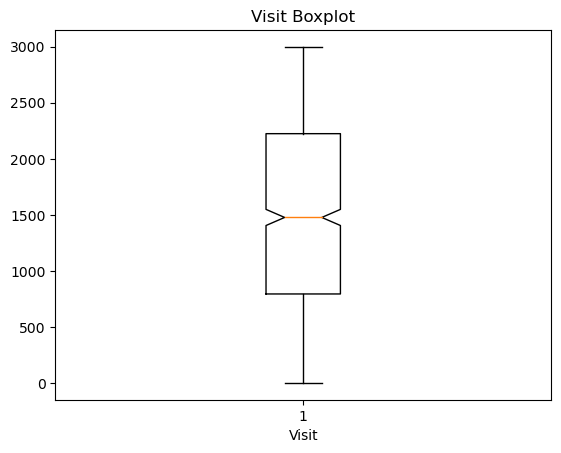

In [16]:
# plotting box plot to check any other outliers 

plt.boxplot(cleanDataDF.visit, notch=True)
plt.title("Visit Boxplot")
plt.xlabel("Visit")
plt.show()

The range of data is from 0- 3000 with major concentration between 750 to 2250. We can look to get rid of any values which are far away from the major concentration

In [17]:
cleanDataDF = cleanDataDF[(cleanDataDF['visit'] <= 2800) & (cleanDataDF['visit'] >= 200)] 
print("Data size after removing Nan and outliers is : " + str(len(cleanDataDF)))

Data size after removing Nan and outliers is : 864


# Insert data into a SQL Lite database – create a table with the following data

a. Name, Address, City, State, Zip, Phone Number

b. Add at least 10 rows of data and submit your code with a query generating your results.

In [18]:
# importing sqlite3 library 

import sqlite3

In [23]:
# making a connection to sql lite db 

con = sqlite3.connect('mydata.sqlite') 

#defining DDL query 

query = "CREATE TABLE UserDataTable (Name VARCHAR(50), Address VARCHAR(500),City VARCHAR(50), State VARCHAR(50),PhoneNumber VARCHAR(50),Zip INTEGER);"

#execute the query to create the table 

con.execute(query) 
con.commit()

In [24]:
# Add data into table 

data = [('James Butt', '6649 N Blue Gum St', 'New Orleans', 'LA', 70116, '504-621-8927'), ('Josephine Darakjy','4 B Blue Ridge Blvd','Brighton','MI',48116,'810-292-9388'), ('Art Venere','8 W Cerritos Ave␣ , #54','Bridgeport','NJ',8014,'856-636-8749'),  ('Lenna Paprocki','639 Main St','Anchorage','AK',99501,'907-385-4412'), ('Donette Foller','34 Center St','Hamilton','OH',45011,'513-570-1893'), ('Simona Morasca','3 Mcauley Dr','Ashland','OH',44805,'419-503-2484'), ('Mitsue Tollner','7 Eads St','Chicago','IL',60632,'773-573-6914'), ('Leota Dilliard','7 W Jackson Blvd','San␣ , Jose','CA',95111,'408-752-3500'), ('Sage Wieser','5 Boston Ave #88','Sioux ,  Falls','SD',57105,'605-414-2147'), ('Kris Marrier','228 Runamuck Pl , #2808','Baltimore','MD',21224,'410-655-8723')]

stmt = "INSERT INTO UserDataTable VALUES(?, ?, ?, ?, ?, ?)" 

con.executemany(stmt, data) 

con.commit()

In [25]:
# Try reading the data from Sql lite table to verify if the data got inserted 

cursor = con.execute('select * from UserDataTable') 
rows = cursor.fetchall() 
rows

[('James Butt',
  '6649 N Blue Gum St',
  'New Orleans',
  'LA',
  '70116',
  '504-621-8927'),
 ('Josephine Darakjy',
  '4 B Blue Ridge Blvd',
  'Brighton',
  'MI',
  '48116',
  '810-292-9388'),
 ('Art Venere',
  '8 W Cerritos Ave␣ , #54',
  'Bridgeport',
  'NJ',
  '8014',
  '856-636-8749'),
 ('Lenna Paprocki', '639 Main St', 'Anchorage', 'AK', '99501', '907-385-4412'),
 ('Donette Foller', '34 Center St', 'Hamilton', 'OH', '45011', '513-570-1893'),
 ('Simona Morasca', '3 Mcauley Dr', 'Ashland', 'OH', '44805', '419-503-2484'),
 ('Mitsue Tollner', '7 Eads St', 'Chicago', 'IL', '60632', '773-573-6914'),
 ('Leota Dilliard',
  '7 W Jackson Blvd',
  'San␣ , Jose',
  'CA',
  '95111',
  '408-752-3500'),
 ('Sage Wieser',
  '5 Boston Ave #88',
  'Sioux ,  Falls',
  'SD',
  '57105',
  '605-414-2147'),
 ('Kris Marrier',
  '228 Runamuck Pl , #2808',
  'Baltimore',
  'MD',
  '21224',
  '410-655-8723')]